# Homework 4: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization

## Introduction

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this project, we will perform tasks to clean, visualize, and explore the bike sharing data. We will also investigate open-ended questions. These open-ended questions aims to extract insights from the visual plots.

### Table of Contents

* Data Preparation
* Wrangling data for analysis
* Exploring Distribution of Riders
* Visualization 
* Joint plots 
* Understanding Daily Patterns 
* Exploring Ride Sharing and Weather
* Expanding Our Analysis

In [ ]:
# Importing Libraries
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [ ]:
data_url = 'https://user/rafine/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Thu Feb 16 23:25:17 2023
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the File Contents



In [ ]:
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? 

In [ ]:
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the Data

The following code loads the data into a `Pandas DataFrame`.

In [ ]:
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the `DataFrame` matches the number of lines in the file, minus the header row.

In [7]:
bike.shape

(17379, 17)

<hr style="border: 1px solid #fdb515;" />

## 0: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 0a
What is the granularity of the data (i.e. what does each row represent)?


Each row represents each instant of a bike usage and a general description and setting of the time, season that bike sharing takes place.

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 0b
For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that one could collect to address some of these limitations?


With the given variabels, we can study and generate our data to explore the type of people who use this particular bike sharing. However, wihtout variables such as zip_code or location, bike stations, it could challenge to assess further data if we're trying to study whether certain population could have access to this new trending transportation. Therefore, a location and traffic (busy or not busy) variables could be useful as they could help determine how a particular area would occupy more bike usage than the other. 

<!-- END QUESTION -->



<hr style="border: 1px solid #fdb515;" />

## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this question we will *mutate* the `DataFrame`, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

<br><br>

--- 
### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on, in order of the previous sentence.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on in order of the previous sentence.

**Note:** If you mutate any of the tables above, then they will not be in the format of their original `.csv` file. As a debugging tip, if you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the `.replace`[(documentation)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the `Pandas DataFrame` class. Take a look at the link.

In [10]:
# Modify holiday weekday, workingday, and weathersit here.
new_bike = {"holiday" : {0: "no", 1: "yes"}, 
            "weekday" : {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"},
            "workingday" : {0: "no", 1: "yes"},
            "weathersit" : {1: "Clear", 2: "Mist", 3: "Light", 4: "Heavy"}}
bike = bike.replace(new_bike)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


<br><br>

--- 
### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [12]:
num_holidays = bike[bike["holiday"] == "yes"]["holiday"].value_counts().iloc[0]
num_holidays

500

<br><br>

--- 
### Question 1c (Computing Daily Total Counts)
In the next few questions, we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

In [14]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
daily_counts = bike.groupby("dteday").agg({"casual": "sum", "registered": "sum", "workingday": "first"})
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


<hr style="border: 1px solid #fdb515;" />

## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders. Questions 2-7 require using many visualization methods so for your convenience, we have summarized a few useful ones below.

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 



<br><br>

--- 
### Question 2a

Use the `sns.histplot`[(documentation)](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.




<img src='images/casual_v_registered.png' width="700px" />


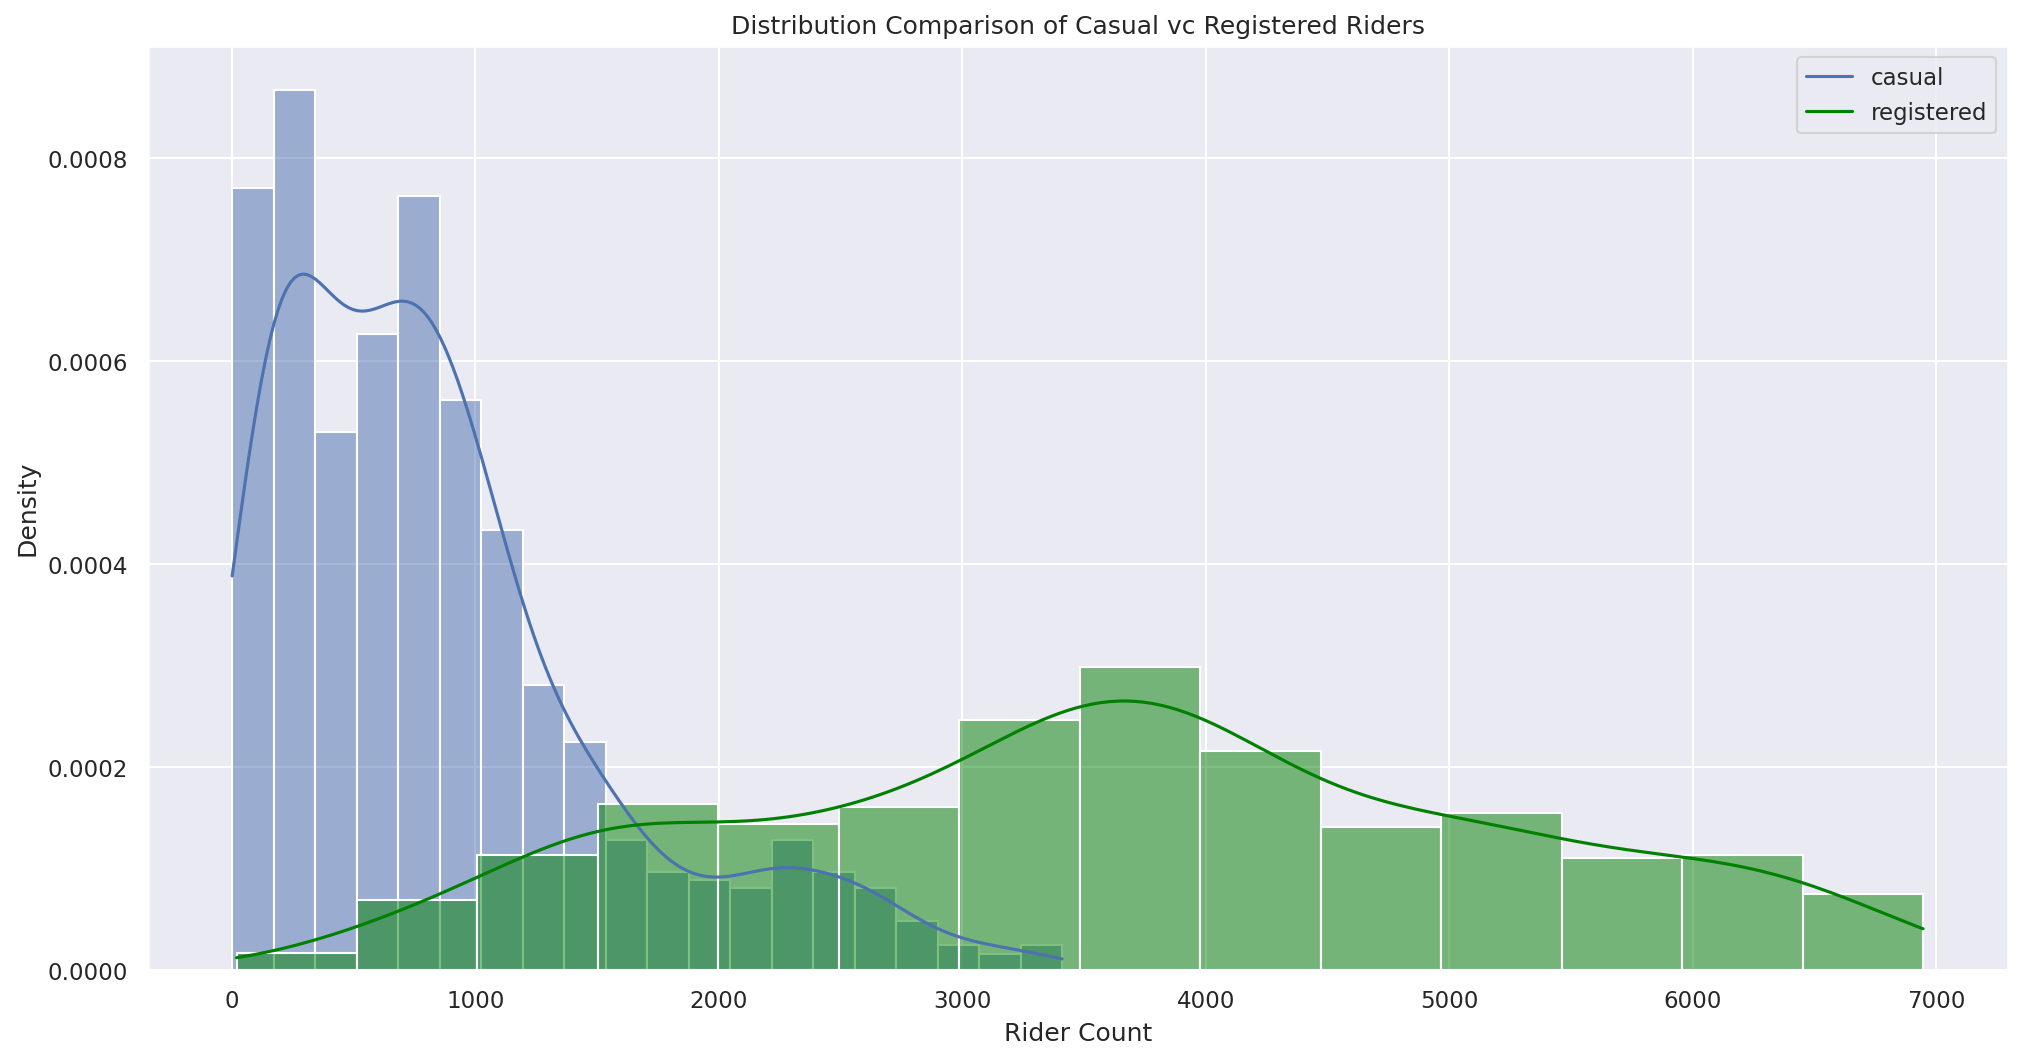

In [17]:
sns.histplot(data=daily_counts, x="casual" , kde=True , stat="density")
sns.histplot(data=daily_counts, x="registered" , kde=True, color="green", stat="density")
plt.xlabel("Rider Count")
plt.ylabel("Density")
plt.title("Distribution Comparison of Casual vc Registered Riders")
plt.legend(["casual", "registered"])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

The distribution and density for casual riders is spread out as it stretches with outlier data and skewed tail. However, the density and distribution for registered riders is more cluttered around 4000 (estimated mode) with a rough symmetrical tail. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2c

The density plots do not show us how the counts for registered and casual riders vary together. Use `sns.lmplot` [(documentation)](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike DataFrame` to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 



Text(0.5, 1.0, 'Comparison of Casual vc Registered Riders on Working and Non-working Days')

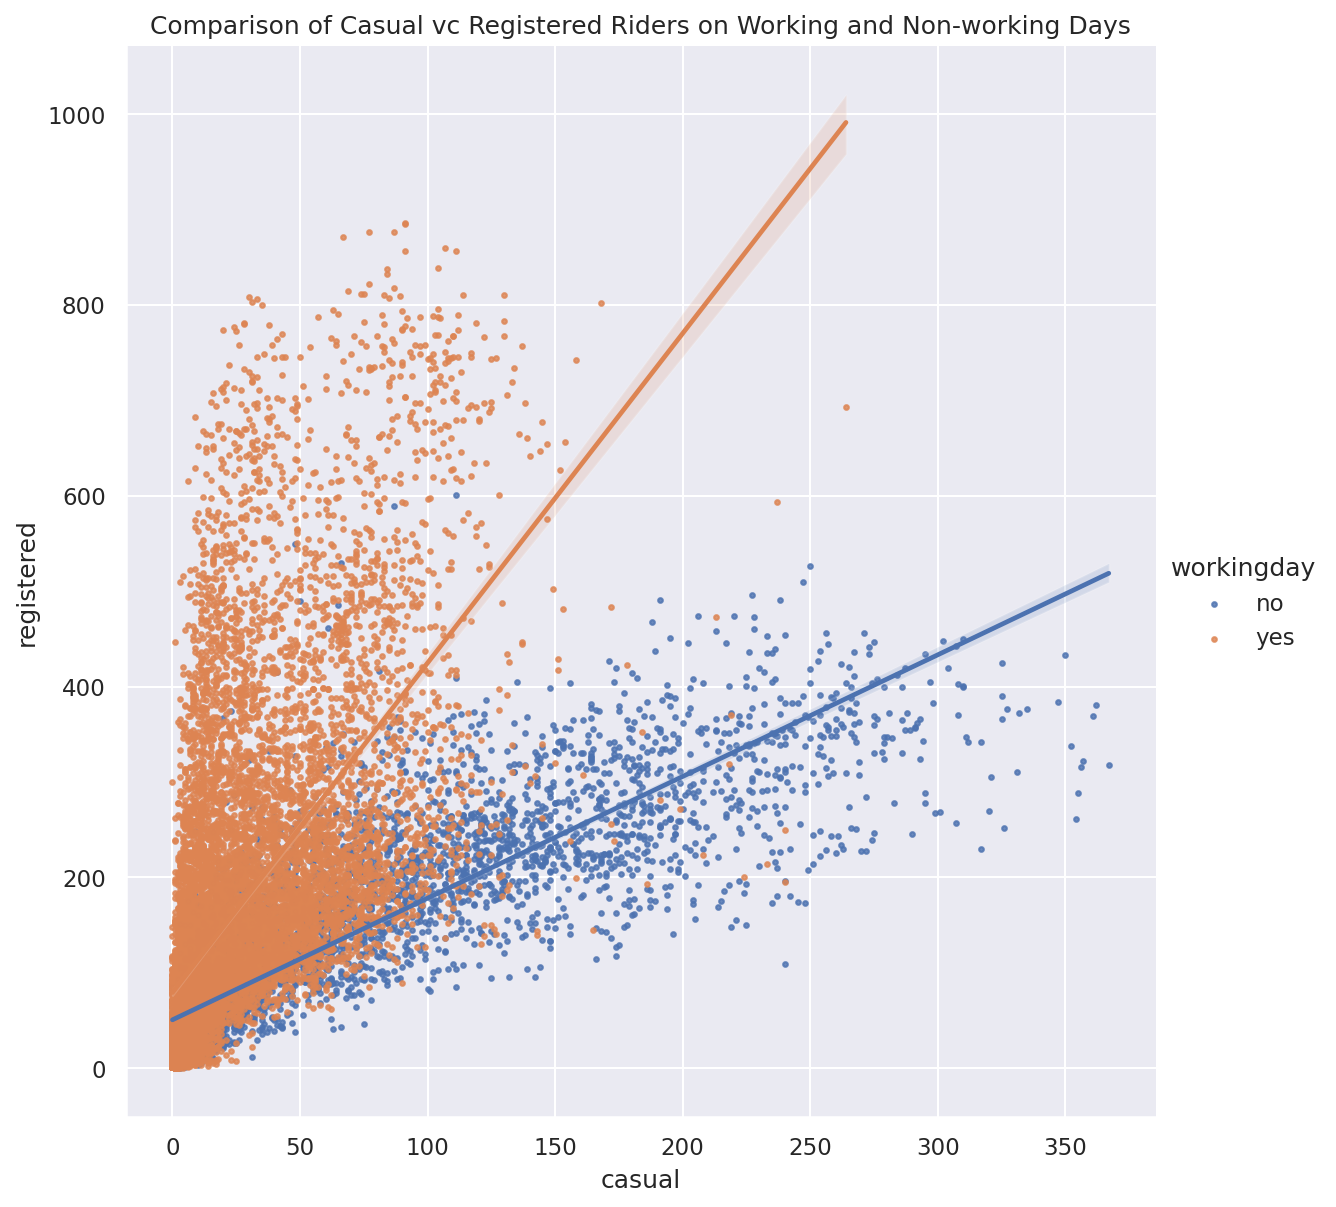

In [18]:
# Make the font size a bit bigger
sns.set(font_scale=1)
sns.lmplot(data= bike, x="casual", y="registered", hue="workingday", scatter_kws={"s": 5}, height= 8)
plt.title("Comparison of Casual vc Registered Riders on Working and Non-working Days")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does overplotting have on your ability to describe this relationship?


This scatteploit reveal a postive correlation between casual and registered riders on both working and on non-working days. On a working day, the number of registered riders is signicantly higher than casual riders. However on a non-working day, the number of casual riders generally increases whereas for registered riders, although still high, decreases by a decent amount. Essentially, overplotting makes it difficult to read and decribe individual data points where everything seems to be cluster in one area, thus makes it challenging to distinguish a true relationship, in this case, between the two variables. 

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 3: Visualization


 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.



A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

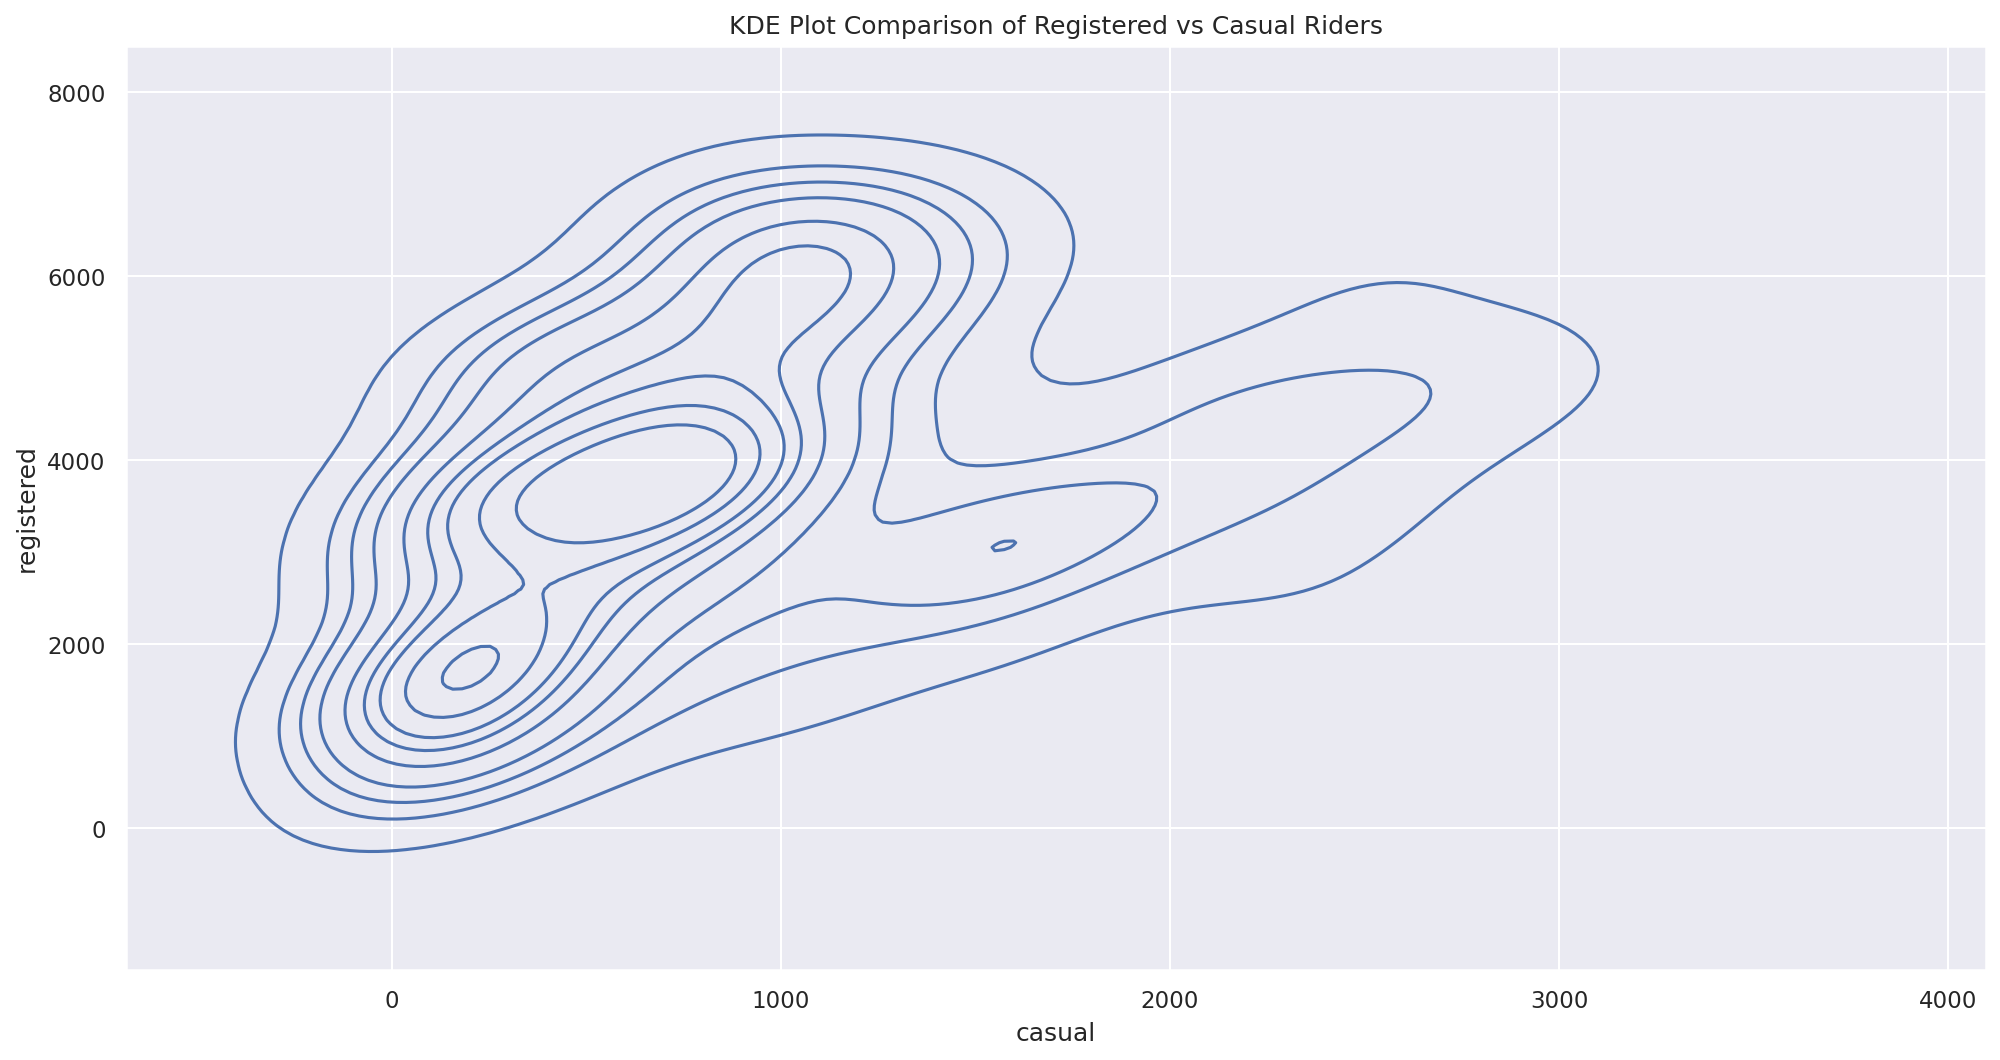

In [19]:
sns.kdeplot(x=daily_counts['casual'], y=daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

<!-- BEGIN QUESTION -->

<br><br>

--- 

### Question 3a (Bivariate Kernel Density Plot)

Generating a bivariate kernel density plot with workday and non-workday separated.

**Hints:** You only need to call `sns.kdeplot` once. Take a look at the `hue` paramter and adjust other inputs as needed.
 
After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 

Text(0.5, 1.0, 'Bivirate KDE Plot Comparison of Registered vs Casual Riders')

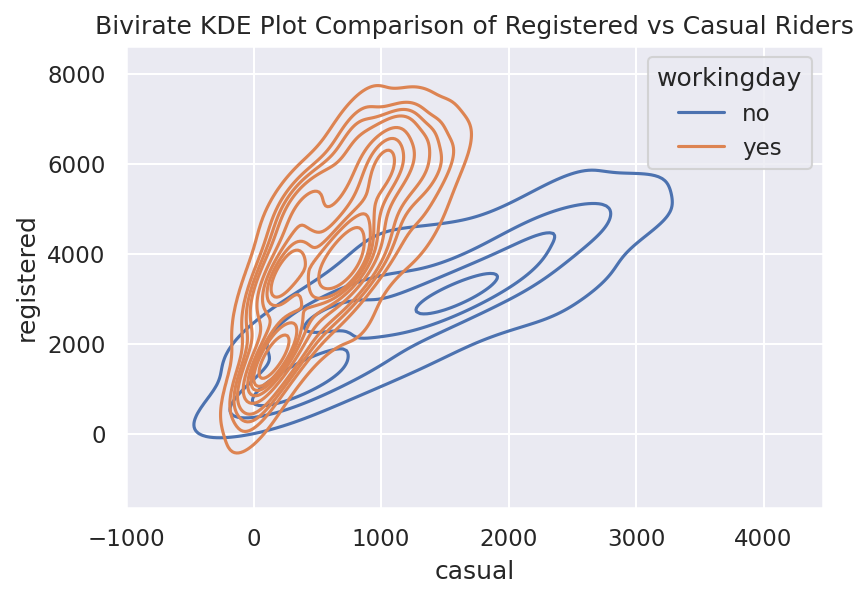

In [20]:
# Set the figure size for the plot
plt.figure(figsize=(6,4))

sns.kdeplot(data=daily_counts, x='casual', y='registered', hue="workingday", height= 3, shade=False)
plt.title('Bivirate KDE Plot Comparison of Registered vs Casual Riders')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 3b
<img src='images/bivariate_kde_of_daily_rider_types_gradient.png' width="600px" />

With some modification to your 3a code (this modification is not in scope), we can obatined the plot above. In your own words, describe what the lines and the color shades of the lines signify about the data. What does each line and color represent?


The lines and color shades of the lines indicates the kernel density distribution between casual and registered riders on both on working and non-working days. We can observe that the darker shade of the density plot shows higher density and lighter shade shows lower density of riders. From the plot, we can see that the number of casual riders increases on non-working days compared to working days, as indicated by the darker shade of the blue contour. However, the number of registered riders seems to be higher on working days than non-working days, which is indicated by the darker shade of the orange contour. 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 3c

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?


From this contour plot, I am able to see a more clear density of casual riders on a non-working days, indicated by the darker shade of the blue contour on the lower counts. On the other hand, in the scatter plot, the distribution and density for causal riders on non-working days are almost completely covered by the individual value count of registered riders.  

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).


**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also called `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.


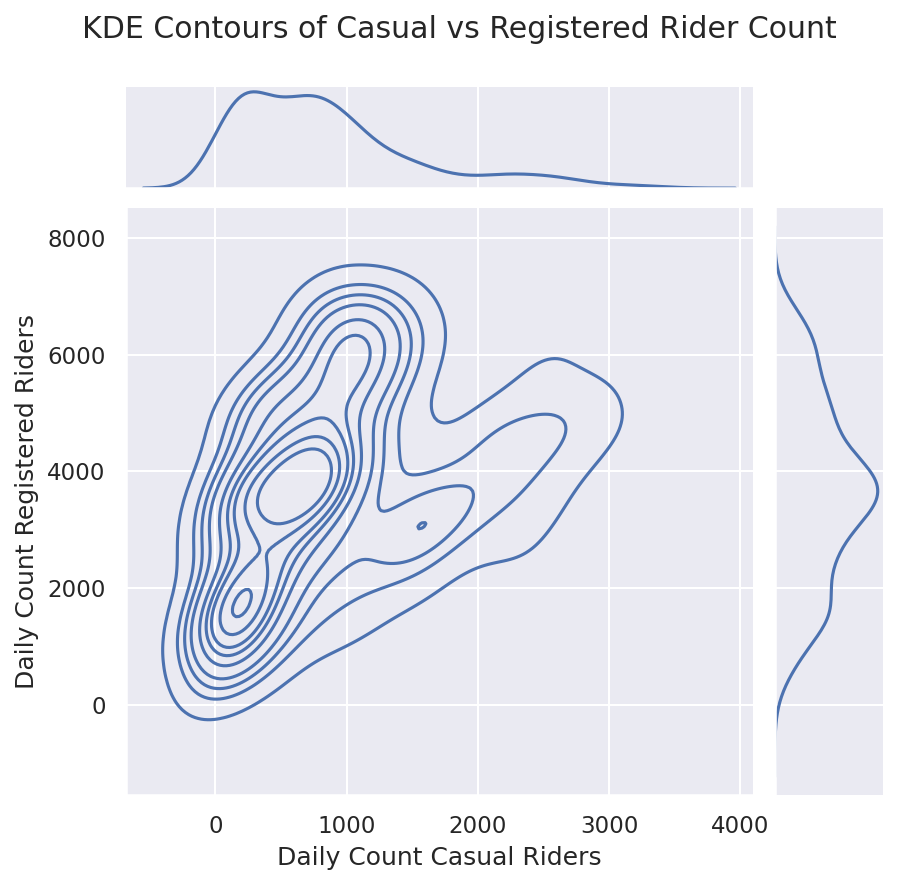

In [21]:
sns_plot = sns.jointplot(data= daily_counts, x="casual", y="registered", kind="kde")
sns_plot.set_axis_labels("Daily Count Casual Riders", "Daily Count Registered Riders")
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 5: Understanding Daily Patterns 

<br><br>

--- 

### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  


In [22]:
bike_by_hr = bike.groupby("hr").agg({"casual": "mean", "registered": "mean"})

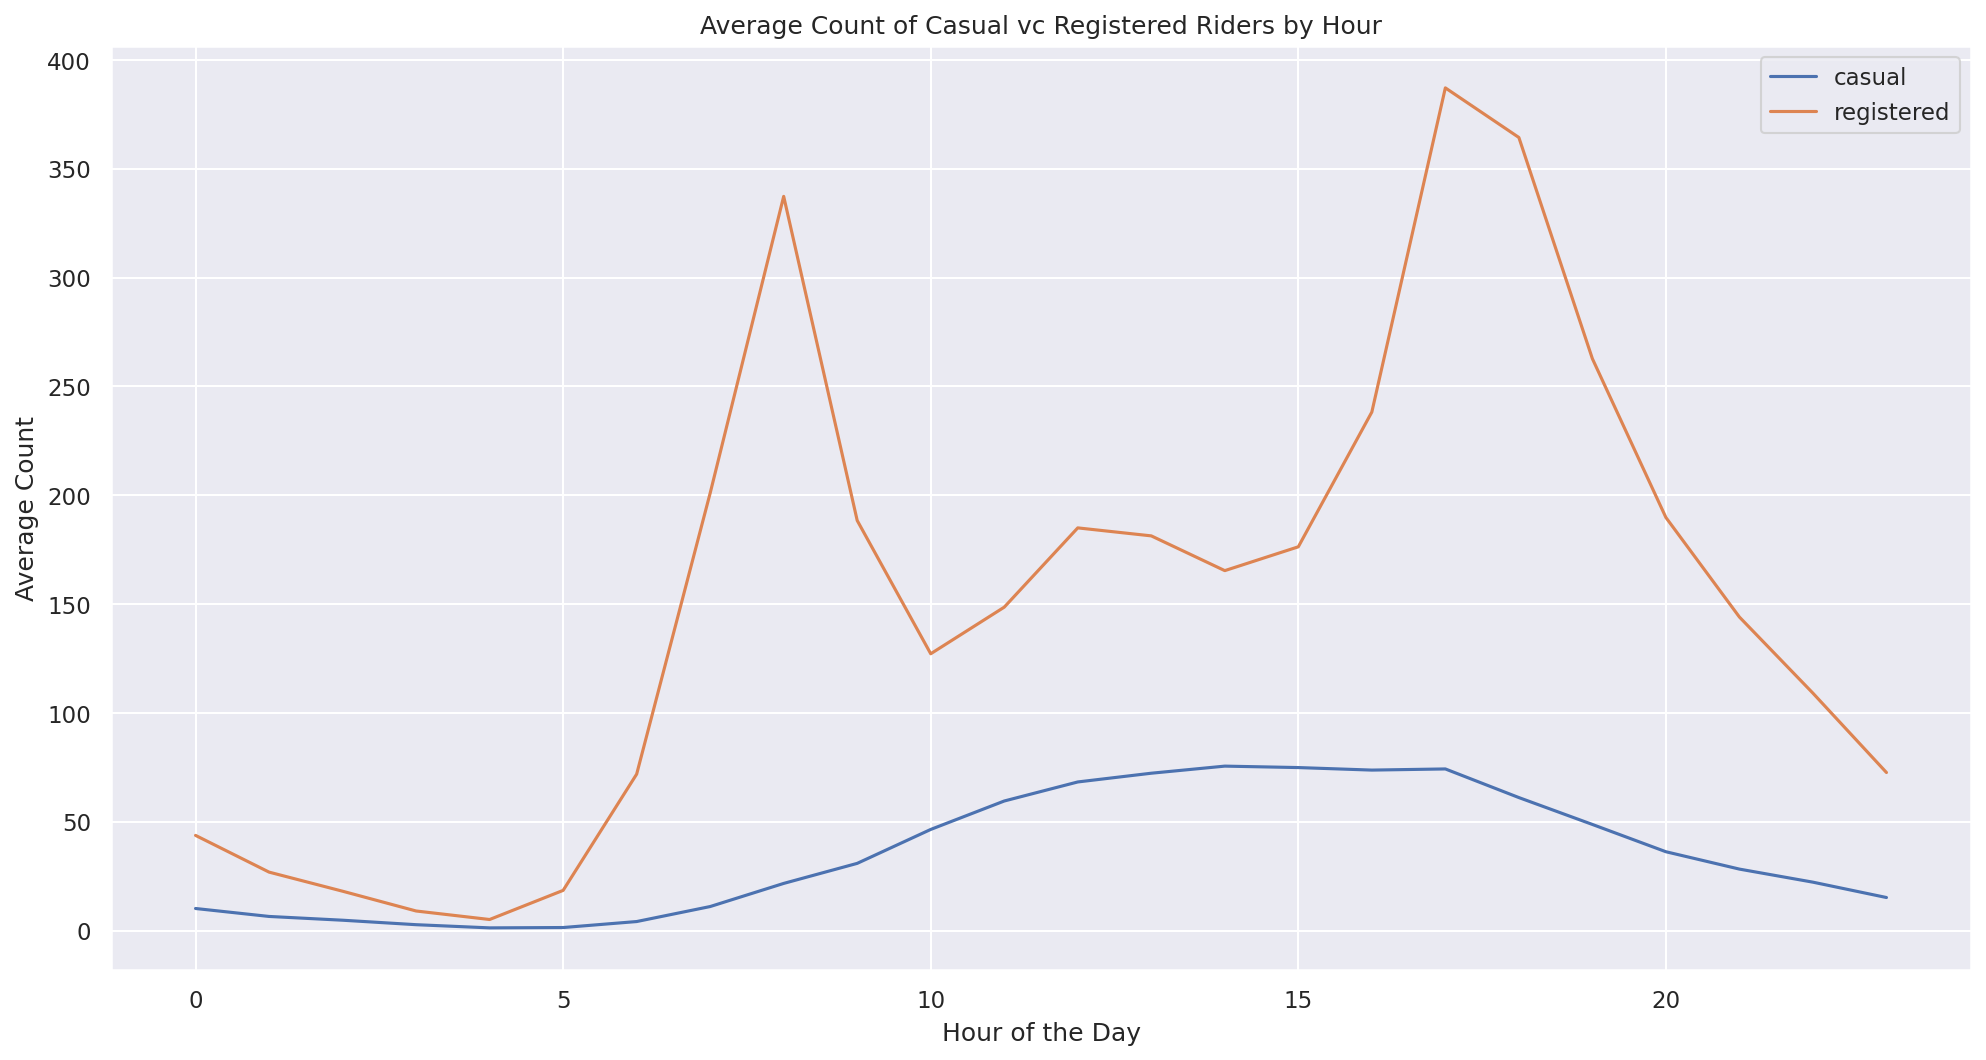

In [23]:
sns.lineplot(data=bike_by_hr, x="hr", y="casual")
sns.lineplot(data=bike_by_hr, x="hr", y="registered")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.title("Average Count of Casual vc Registered Riders by Hour")
plt.legend(["casual", "registered"])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 5b

What can you observe from the plot? Discuss your obseravtion and hypothesize about the meaning of the peaks in the registered riders' distribution.

The distribution for registered riders start to significantly increase after hour 5 and hits a peak before a significant drop between hour 8 and 9. From this, we can infer that the bike usage by registered riders rises during the hours when typically work/business hours begin in the morning. And it immediately drops after morning shift starts. And then from hours 15 to 18, the average number of bike usage begins to increase again and hits its peak (nearly 400). Between those times, it's typically known as rush hours or when most people get out off work, thus it makes sense that these numbers increases and then slow decreases after hour 18. 

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

<br><br>

--- 

### Question 6a
Let's a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.

In [24]:
bike["prop_casual"] = bike["casual"].iloc[:] / bike["cnt"].iloc[:]



In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

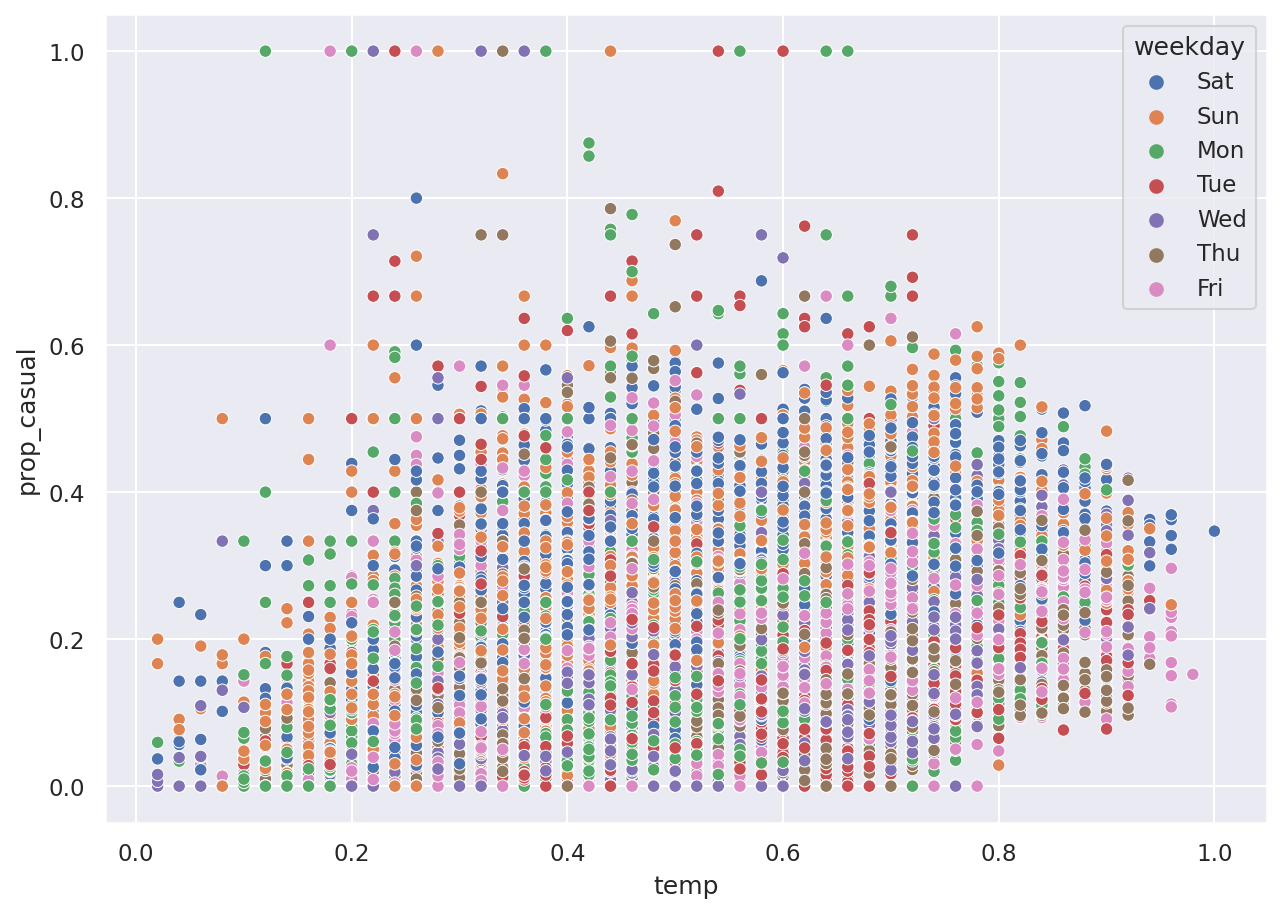

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

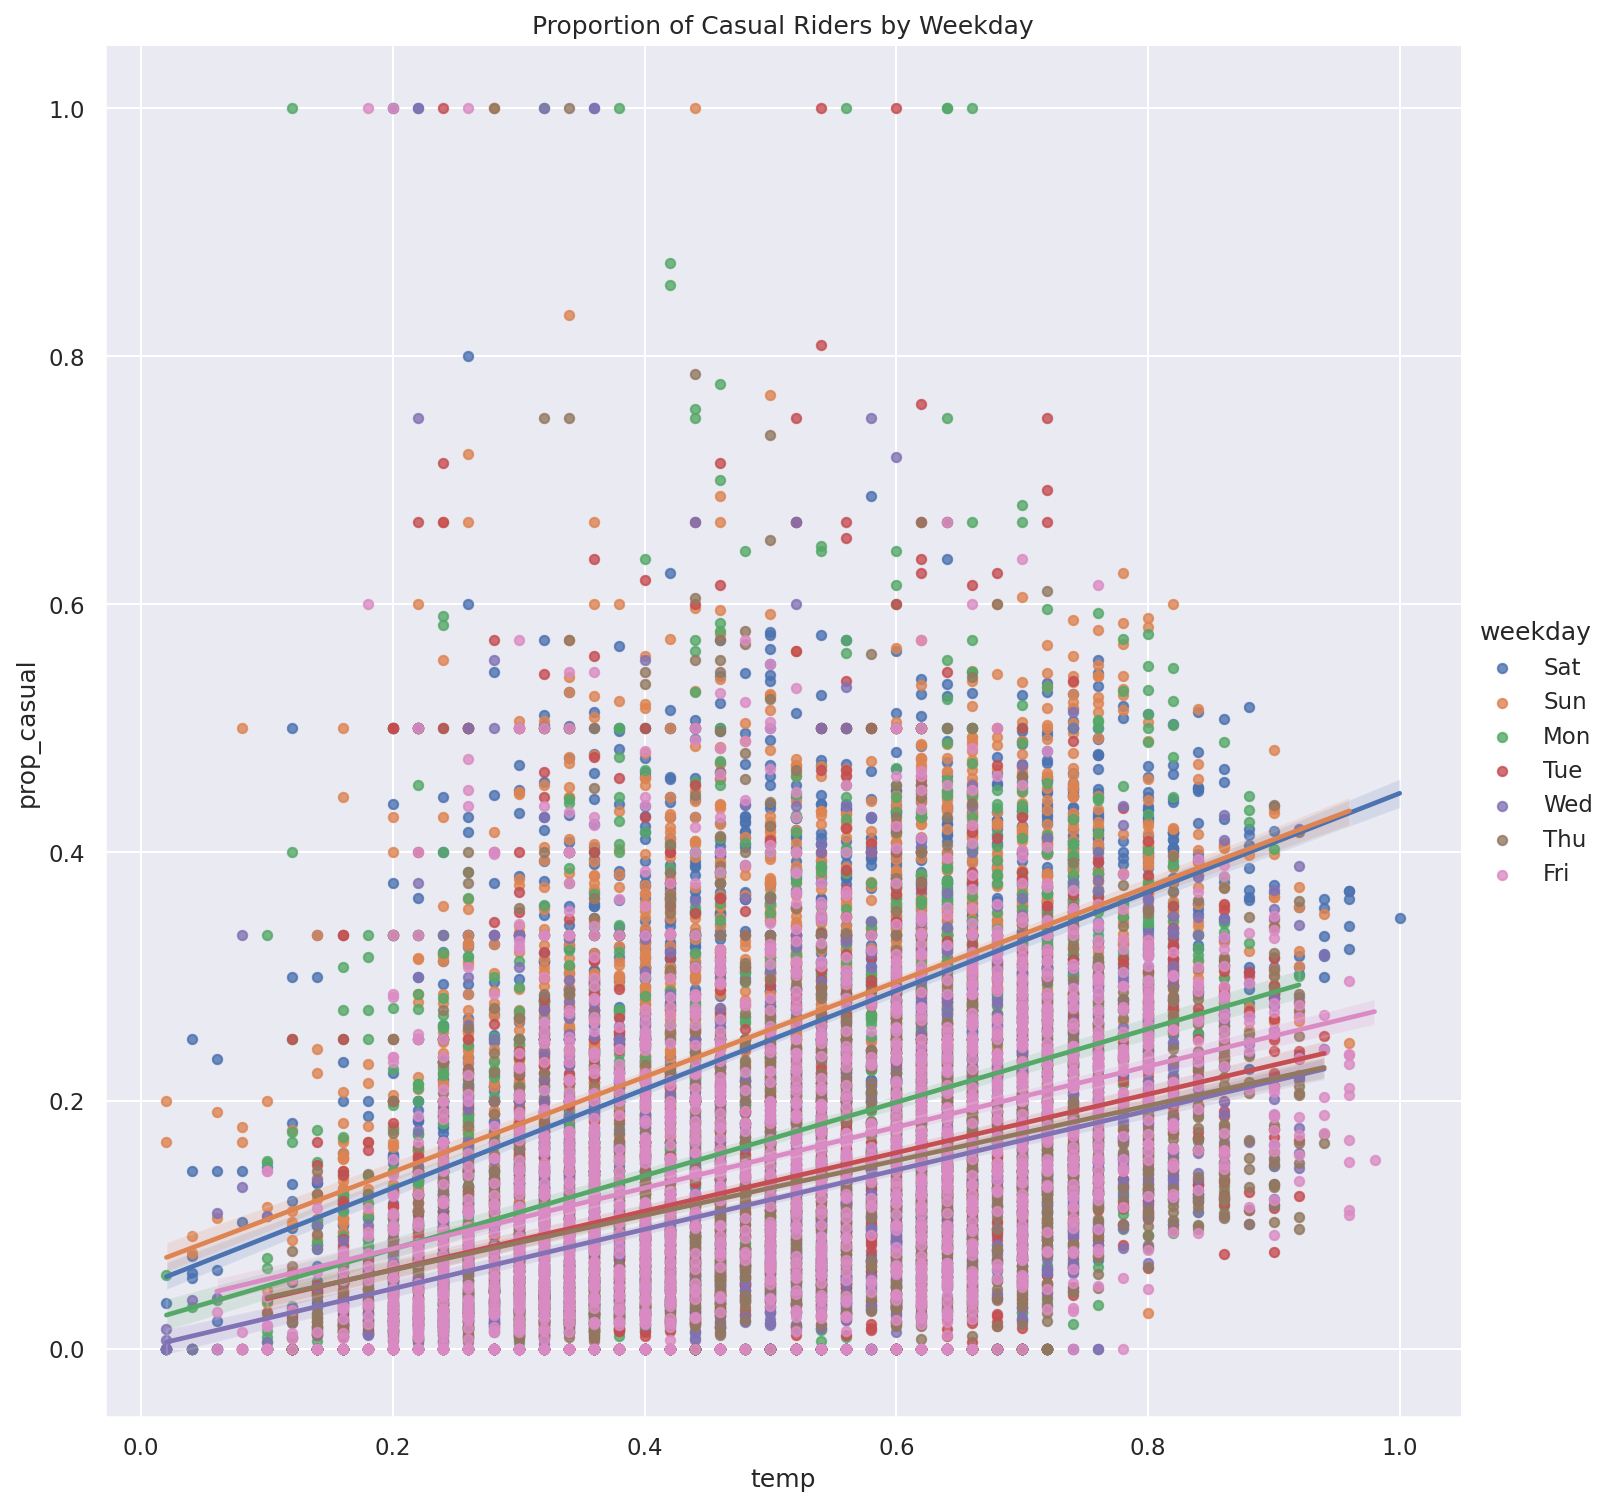

In [27]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

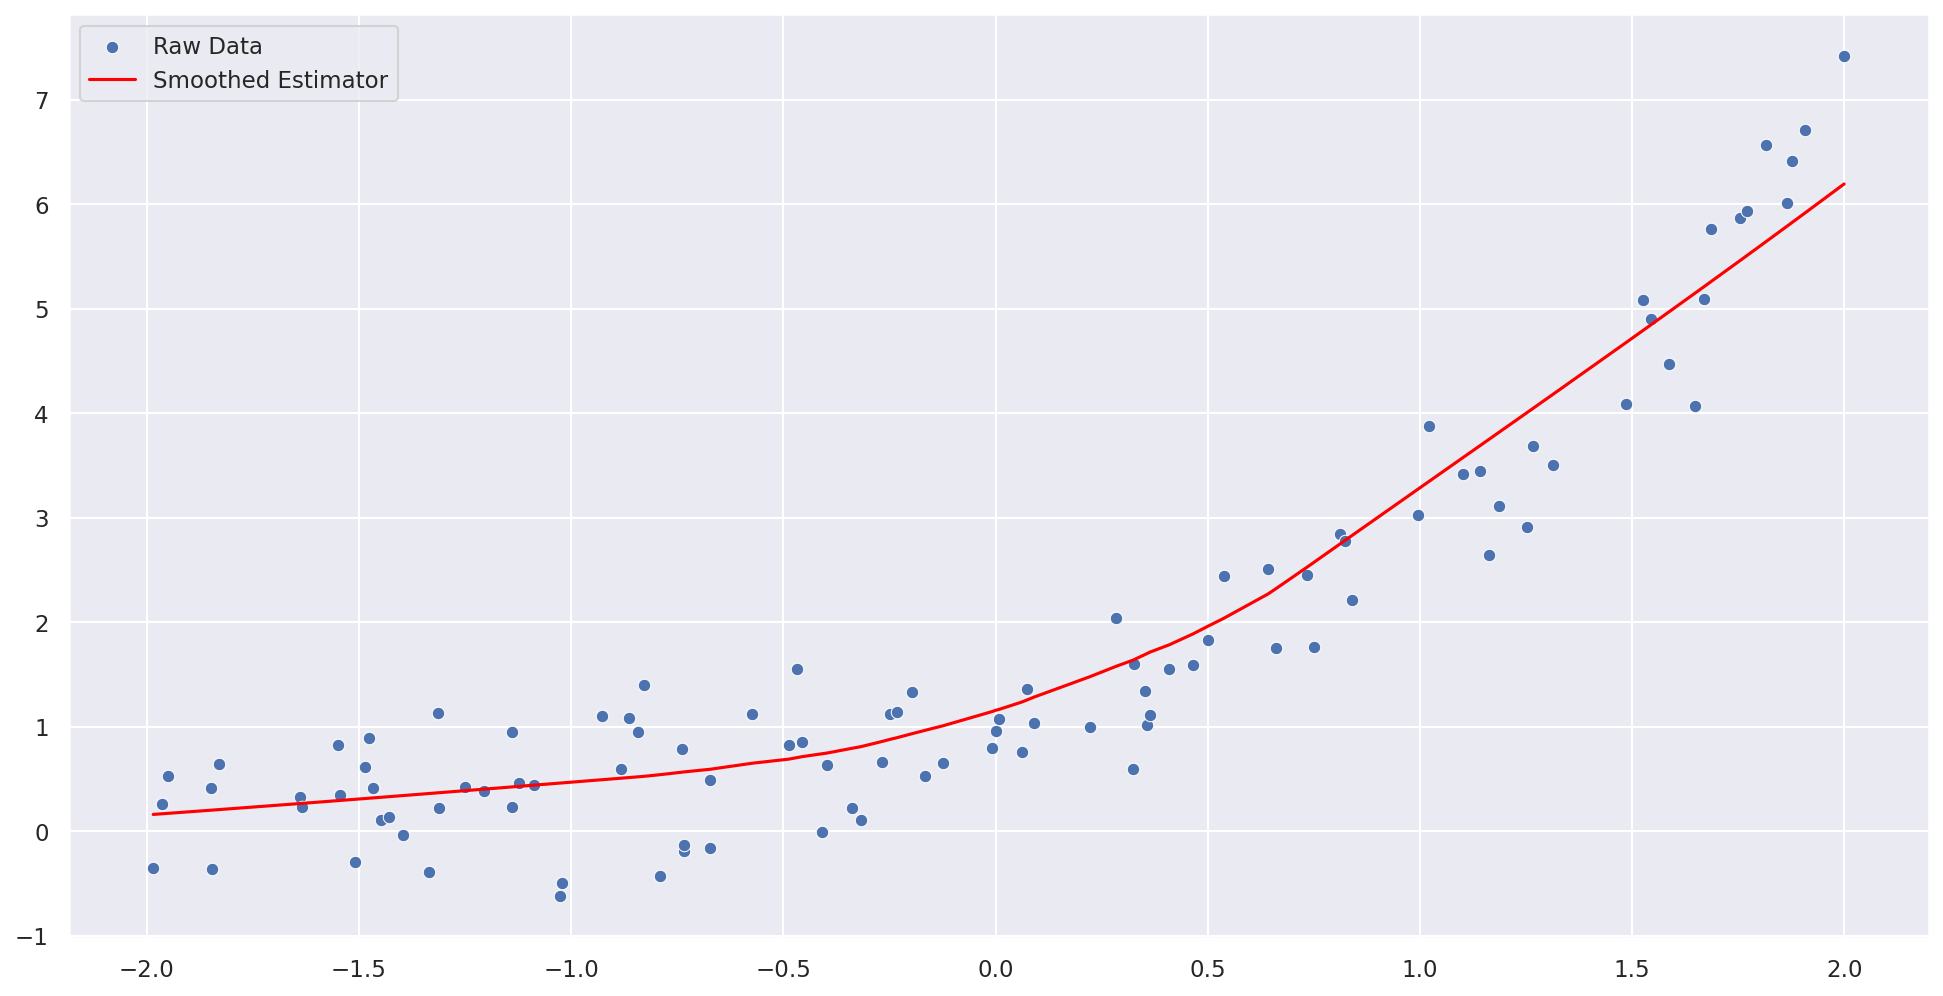

In [28]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 6b

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.


In [29]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


(25.0, 105.0, -0.05, 0.5)

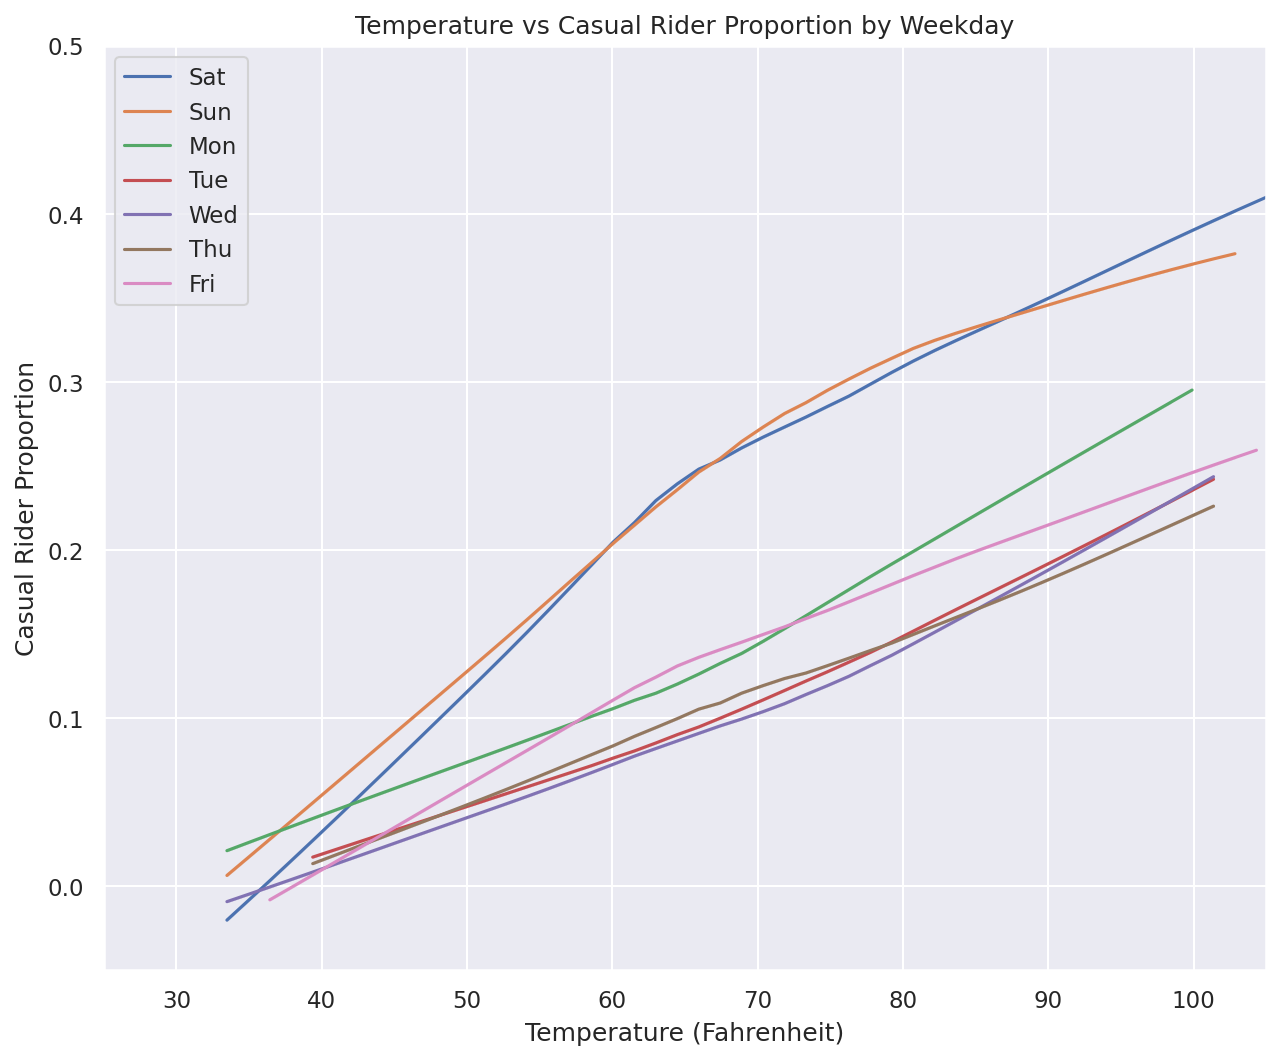

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(10, 8))

for each_day in bike["weekday"].unique():
    yobs = bike[bike["weekday"] == each_day]["prop_casual"]
    xobs = bike[bike["weekday"] == each_day]["temp"]
    ysmooth = lowess(yobs, xobs, return_sorted=False)
    sns.lineplot(((xobs * 41) * (9/5)) + 32, ysmooth, label=each_day)

plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.legend();
plt.axis([25, 105, -0.05, 0.5])
#...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 6c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

I notice that the prop_casual is higher on the weekend compared to weekdays. The proportion of casual riders increases as the temperature increases as well. On weekend, the highest proportion is around .4 when the temperature is about 100 F while on weekends the casual proportion reaches about 0.3. I also notice that the proportion of riders seem to be lower for both weekend and weekdays when temperature is below 50 F which could be due to colder weather. Something i find quite interesting is how Monday and Friday lineplot are somewhat higher than other weekdays. 

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 7: Expanding our Analysis

<!-- BEGIN QUESTION -->

<br><br>

--- 

### Question 7a

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike sharing program is implemented equitably. In this sense, equity is a social value that is informing the deployment and assessment of your bike sharing technology. 

Equity in transportation includes: improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford the transportation services, and assessing how inclusive transportation systems are over time. 

Do you think the `bike` data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.


The current bike sharing dataset can show some ways to measure fairness in bike sharing, but it may not be enough on its own. The data includes things like how many casual or registered riders there are, which tells us how different types of people use the bike sharing system. It also includes weather information, which helps us see how bike usage changes depending on the weather. But, to really understand fairness in bike sharing, we need more information. For example we would need to know things like the users' income, race, gender, and location to see if everyone has equal access to and use of the bike sharing system.

<!-- BEGIN QUESTION -->

<br><br>

--- 
### Question 7b
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us) and new cities and regions are making efforts to implement bike sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities of the U.S. 

Based on your plots in this assignment, what would you recommend and why? Please list at least two reasons why, and mention which plot(s) you drew you analysis from. 

**Note**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots! 


I would recommend expanding bike sharing to popular and cluster cities in the US, for example in Los Angeles, San Diego, Washington DC, San Francisco and etc. From the hourly usage plot with casual and registered riders, we can see a consistent pattern across weekdays and weekends, with usage during commuting hours and lower usage during off peak hours. This indicates that bike sharing could be useful mode of transportation for people traveling to and from work or school and other purposes during rush/peak hours. And in the plots of temperature vs the prop_casual riders, we observe that there is a positive correlation between the two variables. This indicates that bike sharing may be a more attractive transportation option in cities with warmer climates, where more people would prefer riding a bike rather than other form of transportation such as cars or buses.

<!-- END QUESTION -->

